In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 64
IMG_HIGHT = 512
IMG_WIDTH = 512
RGB = 3
EPOCHS = 2

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "DataSets\Glasses",
    batch_size = BATCH_SIZE,
    shuffle = True,
    image_size = (IMG_WIDTH,IMG_HIGHT) 
)

Found 4920 files belonging to 2 classes.


In [4]:
CLASS_NAME = dataset.class_names
CLASS_NAME

['glasses', 'no_glasses']

In [5]:
len(dataset)

77

In [6]:
def Data_Preparation(ds,train_split = 0.8, test_split = 0.1,val_split = 0.1,shuffle = True,shuffle_size = 1000):
        ds_size = len(dataset)
        train_size = int(ds_size*train_split)
        test_size = int(ds_size*test_split)
        
        if shuffle:
            ds = ds.shuffle(shuffle_size,seed = 12)
            
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(test_size)
        test_ds = ds.skip(train_size).skip(test_size)
        return  train_ds,val_ds,test_ds
   

In [7]:
train_ds,val_ds,test_ds = Data_Preparation(dataset)

In [8]:
len(train_ds),len(val_ds),len(test_ds)

(61, 7, 9)

In [9]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
# val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
# test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [10]:
resize_nd_rescale = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_WIDTH,IMG_HIGHT),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
augmentation = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
input_shape = (BATCH_SIZE,IMG_WIDTH,IMG_HIGHT,RGB)
op_classes = len(dataset.class_names)
model = keras.models.Sequential([
    resize_nd_rescale,
    augmentation,
    keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation = 'relu' ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation = 'relu' ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(op_classes,activation = 'softmax')
])
model.build(input_shape = input_shape)

In [13]:
model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (64, 512, 512, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (64, 512, 512, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (64, 510, 510, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (64, 255, 255, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (64, 253, 253, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (64, 126, 126, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (64, 124, 124, 64)       

In [15]:
performance = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs = EPOCHS,
#     validation_data = val_ds
    
)

Epoch 1/2
61/61 [==============================] - 2024s 32s/step - loss: 0.5527 - accuracy: 0.7497
Epoch 2/2
61/61 [==============================] - 2029s 32s/step - loss: 0.0670 - accuracy: 0.9813


In [16]:
performance.history.keys()

dict_keys(['loss', 'accuracy'])

In [18]:
train_acc = performance.history['accuracy']
# val_acc = performance.history['val_accuracy']
train_loss = performance.history['loss']
# val_loss = performance.history['val_loss']

In [19]:
# plt.figure(figsize=(12,10))
# plt.subplot(1,2,1)
# plt.plot(train_acc,label = 'Training Accuracy')
# plt.plot(val_acc,label = 'validation Accuracy')
# plt.legend()
# plt.title("training and validation accuracy")
 
# plt.subplot(1,2,2)
# plt.plot(train_loss,label = 'Training loss')
# plt.plot(val_loss,label = 'validation loss')
# plt.legend()
# plt.title("training and validation loss")

In [20]:
scores = model.evaluate(test_ds)

9/9 [==============================] - 76s 3s/step - loss: 0.0170 - accuracy: 0.9931


In [27]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    predicted_label = dataset.class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_label,confidence

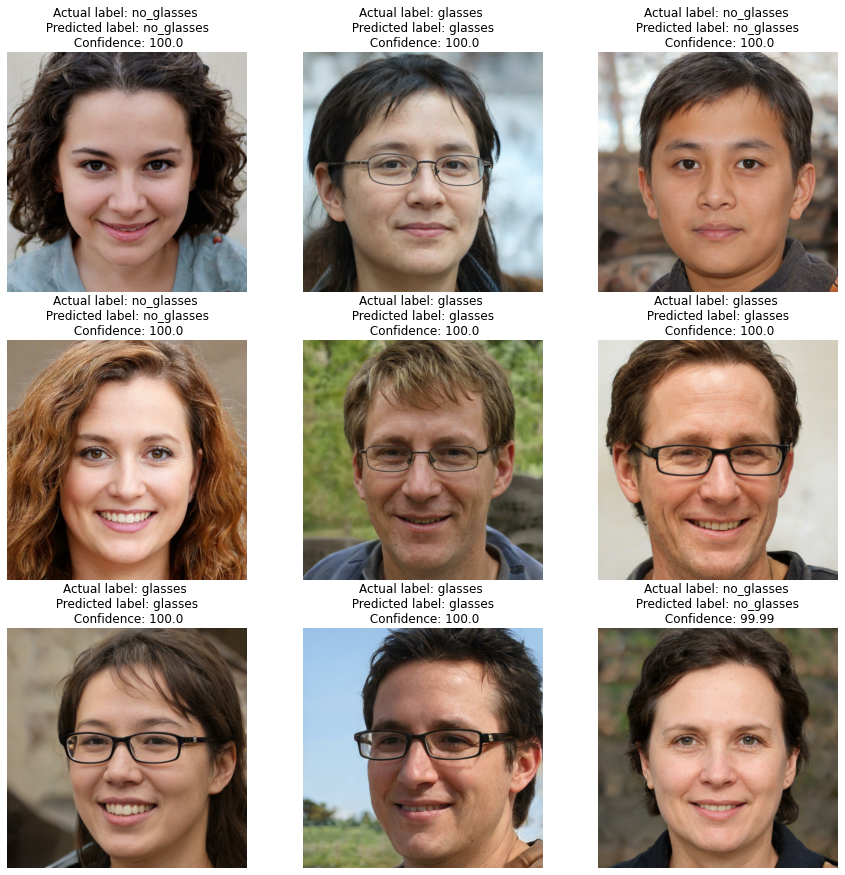

In [28]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_label,confidence = predict(model,images[i])
        actual_label = dataset.class_names[labels[i]]
        plt.axis('off')
        plt.title(f"Actual label: {actual_label} \n Predicted label: {predicted_label} \n Confidence: {confidence}")
    

In [38]:
new_data  = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "DataSets\glassestest",
    shuffle = True,
    image_size = (IMG_WIDTH,IMG_HIGHT) 
)

Found 9 files belonging to 1 classes.


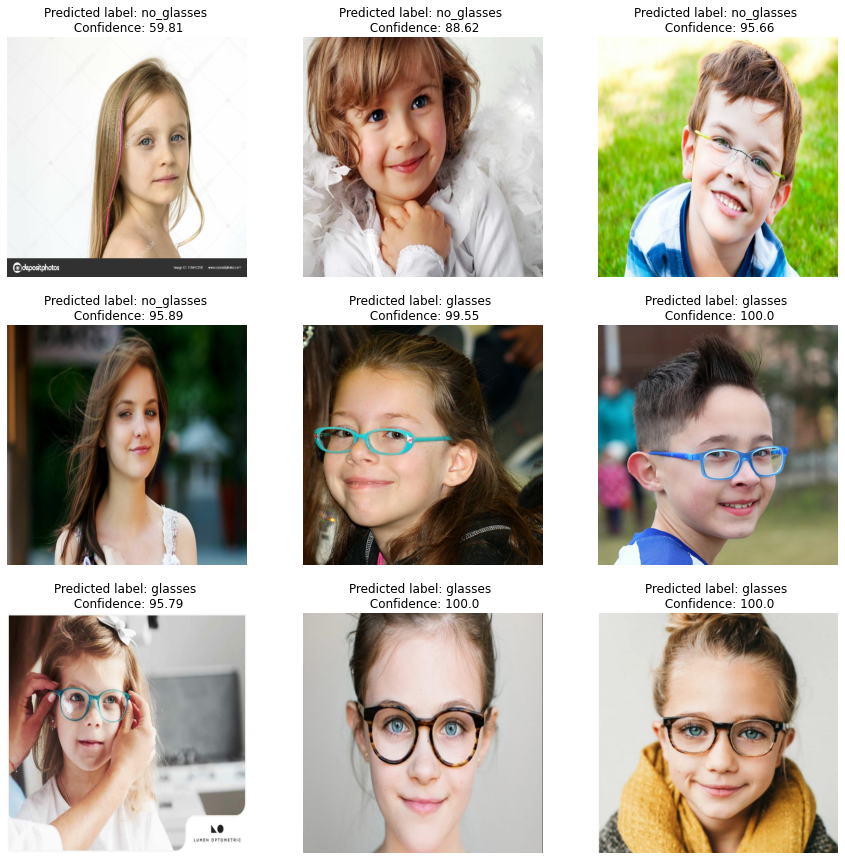

In [39]:
plt.figure(figsize=(15,15))
for images,labels in new_data :
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_label,confidence = predict(model,images[i])
#         actual_label = dataset.class_names[labels[i]]
        plt.axis('off')
        plt.title(f"Predicted label: {predicted_label} \n Confidence: {confidence}")